In [1]:
!pip install scikit-learn

In [2]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load the data

In [4]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data_hidden.csv')
test_data_hidden = pd.read_csv('test_data_hidden.csv')

In [5]:
train_data.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [6]:
!pip install wordcloud

In [7]:
from wordcloud import WordCloud

####  a word cloud for reviews.text

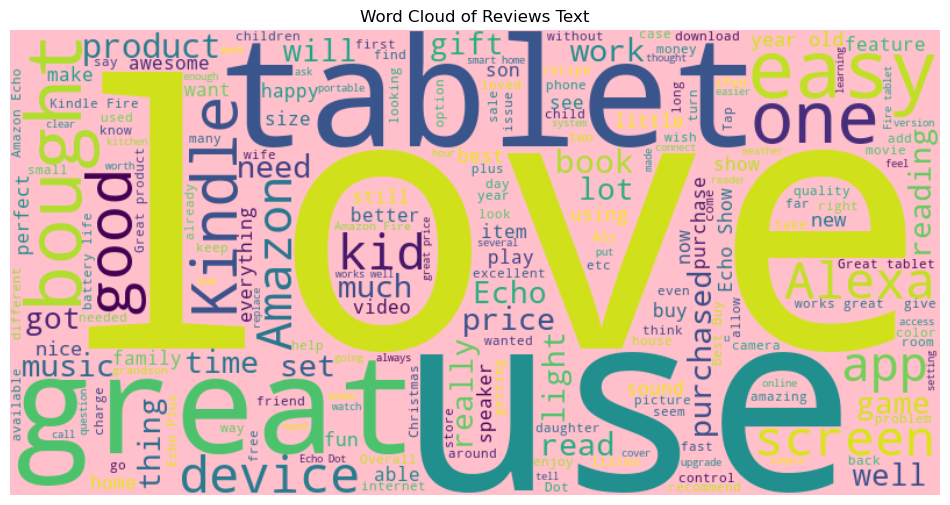

In [9]:
if 'reviews.text' in train_data.columns:
    text_data = ' '.join(train_data['reviews.text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='pink').generate(text_data)
    plt.figure(figsize=(12, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews Text')
    plt.show()

#### Renaming columns

In [11]:
train_data = train_data.rename(columns={
    'Name of the product': 'Nameoftheproduct',
    'Product Brand': 'ProductBrand',
    'reviews.date': 'reviewsdate',
    'reviews.text': 'reviewstext',
    'reviews.title': 'reviewstitle'
    })

train_data.head()

,Nameoftheproduct,ProductBrand,categories,primaryCategories,reviewsdate,reviewstext,reviewstitle,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [12]:
test_data = test_data.rename(columns={
    'Name of the product': 'Nameoftheproduct',
    'Product Brand': 'ProductBrand',
    'reviews.date': 'reviewsdate',
    'reviews.text': 'reviewstext',
    'reviews.title': 'reviewstitle'
    })

In [13]:
test_data_hidden = test_data_hidden.rename(columns={
    'Name of the product': 'Nameoftheproduct',
    'Product Brand': 'ProductBrand',
    'reviews.date': 'reviewsdate',
    'reviews.text': 'reviewstext',
    'reviews.title': 'reviewstitle'
    })

In [14]:
test_data.head()

,Nameoftheproduct,ProductBrand,categories,primaryCategories,reviewsdate,reviewstext,reviewstitle,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [15]:
train_data.columns

Index(['Nameoftheproduct', 'ProductBrand', 'categories', 'primaryCategories',
       'reviewsdate', 'reviewstext', 'reviewstitle', 'sentiment'],
      dtype='object')

#### Drop unnecessary columns

In [17]:
columns_to_drop = ['Nameoftheproduct', 'ProductBrand']
train_data = train_data.drop(columns=columns_to_drop, axis=1)
test_data = test_data.drop(columns=columns_to_drop, axis=1)
test_data_hidden = test_data_hidden.drop(columns=columns_to_drop, axis=1)

In [18]:
train_data.isnull().sum()

categories            0
primaryCategories     0
reviewsdate           0
reviewstext           0
reviewstitle         10
sentiment             0
dtype: int64

In [19]:
# Handle missing values
train_data = train_data.fillna('Unknown')
test_data = test_data.fillna('Unknown')
test_data_hidden = test_data_hidden.fillna('Unknown')

In [20]:
train_data.isnull().sum()

categories           0
primaryCategories    0
reviewsdate          0
reviewstext          0
reviewstitle         0
sentiment            0
dtype: int64

#### Visualize the sentiment distribution in train_data

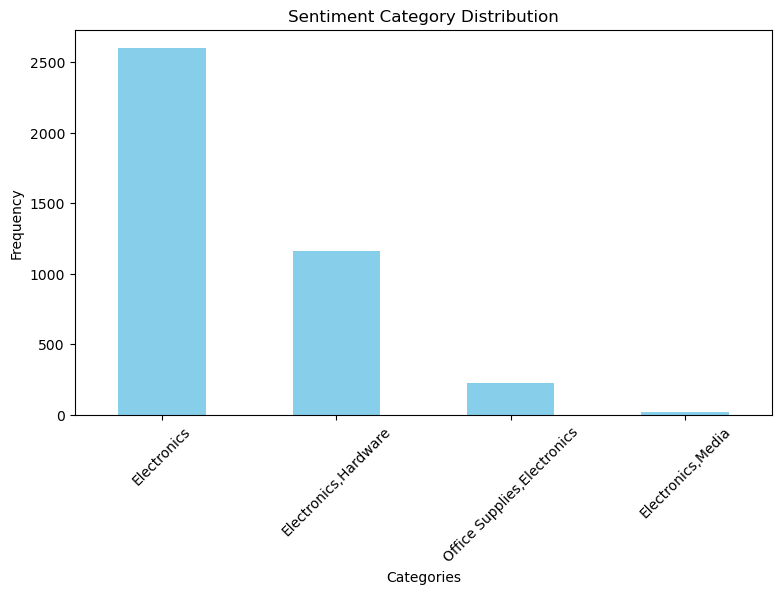

In [22]:

if 'categories' in train_data.columns:
    sentiment_counts = train_data['primaryCategories'].value_counts()
    plt.figure(figsize=(9, 5))
    sentiment_counts.plot(kind='bar', color='skyblue')
    plt.title('Sentiment Category Distribution')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

The Electronics category has the most reviews in the dataset, making it the most popular category.
Electronics Hardware comes next but has far fewer reviews compared to general Electronics.
Other categories like Office Supplies, Electronics Accessories, and Electronics Media have very few reviews, showing that the data is not evenly balanced across categories.

In [24]:
train_data.columns

Index(['categories', 'primaryCategories', 'reviewsdate', 'reviewstext',
       'reviewstitle', 'sentiment'],
      dtype='object')

#### Sentiment analysis example (simple categorization for visualization)

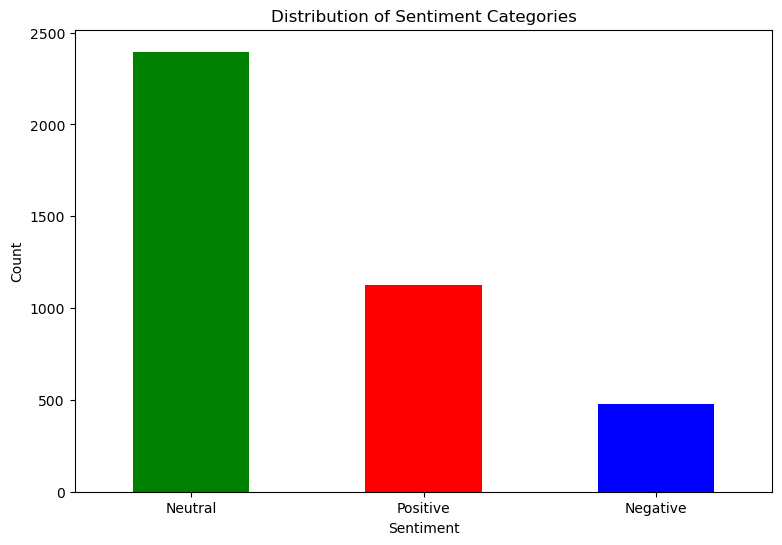

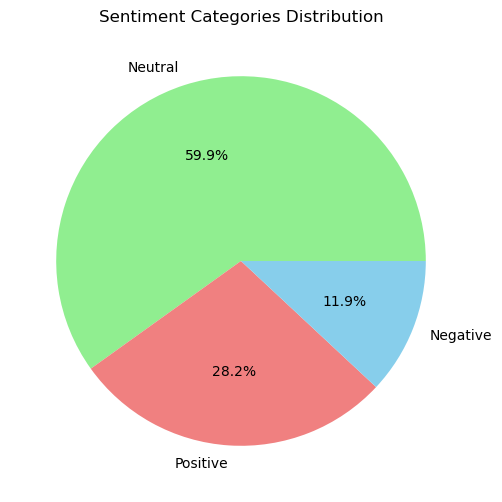

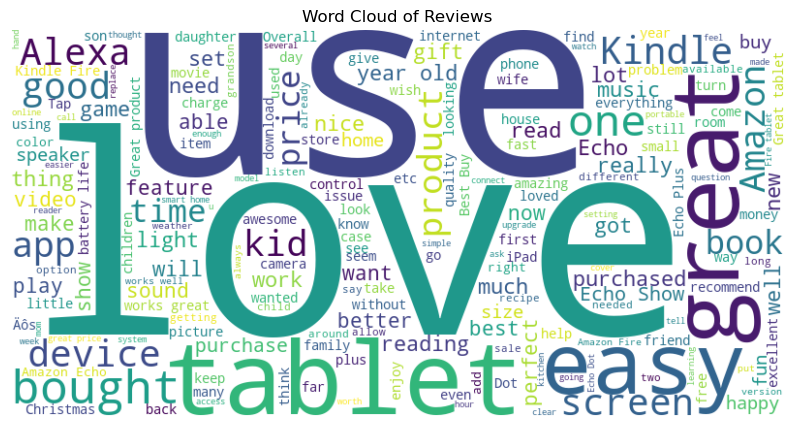

In [26]:
def categorize_sentiment(text):
    if 'great' in text.lower() or 'highly recommended' in text.lower():
        return 'Positive'
    elif 'not' in text.lower() or 'disappointing' in text.lower():
        return 'Negative'
    else:
        return 'Neutral'

train_data['Sentiment'] = train_data['reviewstext'].apply(categorize_sentiment)

# 1. Bar plot for sentiment distribution
sentiment_counts = train_data['Sentiment'].value_counts()
plt.figure(figsize=(9, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 2. Pie chart for sentiment distribution
plt.figure(figsize=(9, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'skyblue'])
plt.title('Sentiment Categories Distribution')
plt.ylabel('')
plt.show()

# 3. Word cloud for reviews text
all_reviews = ' '.join(train_data['reviewstext'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

### Convert reviews.date to datetime

In [28]:
train_data['reviewsdate'] = pd.to_datetime(train_data['reviewsdate'], errors='coerce')

# Extract year, month, and day for analysis
train_data['review_year'] = train_data['reviewsdate'].dt.year
train_data['review_month'] = train_data['reviewsdate'].dt.month
train_data['review_day'] = train_data['reviewsdate'].dt.day

# Clean and Prepare the Text Data
Before working with text data like reviews and titles, it’s important to clean it up so the computer can understand it better. This process includes:

Converting all text to lowercase
Removing punctuation, special characters, and common stopwords (like “the,” “and,” “is”)
Breaking text into words (tokenizing) and reducing them to their base form (stemming or lemmatizing)
These steps make the text cleaner and more consistent for analysis. 

In [30]:
train_data.head()

,categories,primaryCategories,reviewsdate,reviewstext,reviewstitle,sentiment,Sentiment,review_year,review_month,review_day
0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26 00:00:00+00:00,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,Positive,2016,12,26
1,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17 00:00:00+00:00,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,Neutral,2018,1,17
2,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20 00:00:00+00:00,Just an average Alexa option. Does show a few ...,Average,Neutral,Neutral,2017,12,20
3,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04 00:00:00+00:00,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,Neutral,2017,8,4
4,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23 00:00:00+00:00,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,Neutral,2017,1,23


### Text Analysis

Create Word Clouds or Show Frequent Words
Goal: To find out which words appear most often in each type of sentiment (positive, negative, or neutral).

In [32]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


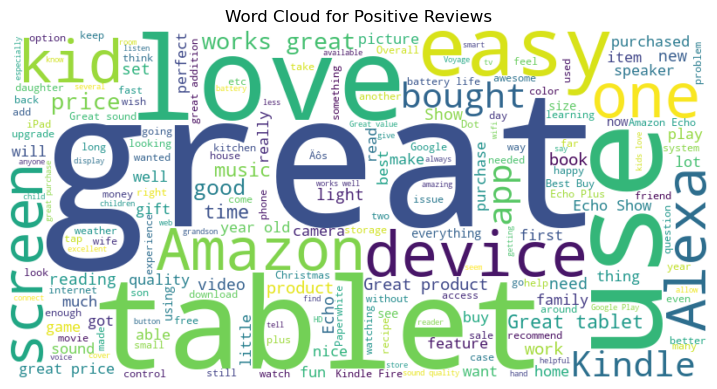

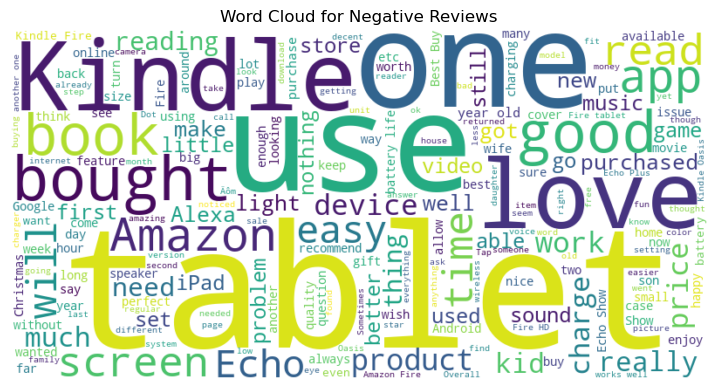

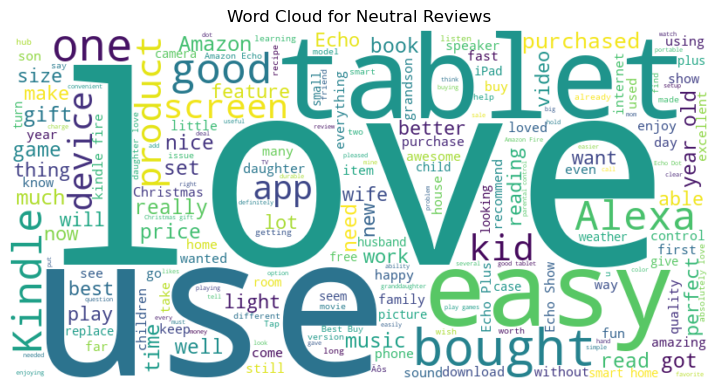

In [33]:
from wordcloud import WordCloud

def generate_wordcloud(sentiment, data):
    text = " ".join(review for review in data[data['Sentiment'] == sentiment]['reviewstext'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(9,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()

for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_wordcloud(sentiment, train_data)

### Observations:

In positive reviews, words like “great,” “product,” “highly,” and “recommended” appear most often. These words show that people are generally happy and satisfied with their purchases.

In negative reviews, words like “disappointing,” “expected,” and “quite” are common, showing that customers were not satisfied or felt let down.

In neutral or mixed reviews, words like “quality,” “decent,” “value,” “money,” and “good” appear frequently, suggesting that the feedback is balanced — not too positive and not too negative.


### Interpretation:

Words like “Great” and “Product” show that customers often use these terms to share their positive experiences.
Terms such as “Highly” and “Recommended” suggest that people are very satisfied and often encourage others to buy the product.

The word “Disappointing” clearly reflects unhappiness or unmet expectations, while “Expected” indicates that the product didn’t live up to what the customer hoped for.
The word “Quite” might show a mild or polite form of dissatisfaction.

Words like “Quality” and “Value” suggest that customers are talking about how well the product performs or whether it’s worth the price.
“Decent” and “Good” show average or moderate satisfaction — not bad, but not overly enthusiastic either.
Finally, “Money” often appears in reviews discussing value for money, which seems to be a neutral concern among customers.

### Insights for Action:

This analysis can help businesses identify positive themes in customer feedback.

Marketing teams might use these terms in campaigns to resonate with customer sentiment, e.g., "Highly Recommended Product!"

It may be helpful to further analyze the context in which these words appear (e.g., through topic modeling or phrase extraction) to identify specific issues.

Businesses can focus on improving these aspects to shift neutral reviews toward a positive sentiment by adding more value or improving quality.

###  Analyze the Length of Reviews

Compute review lengths.

In [38]:
train_data['Review_Length'] = train_data['reviewstext'].apply(len)

Visualize review lengths by sentiment.

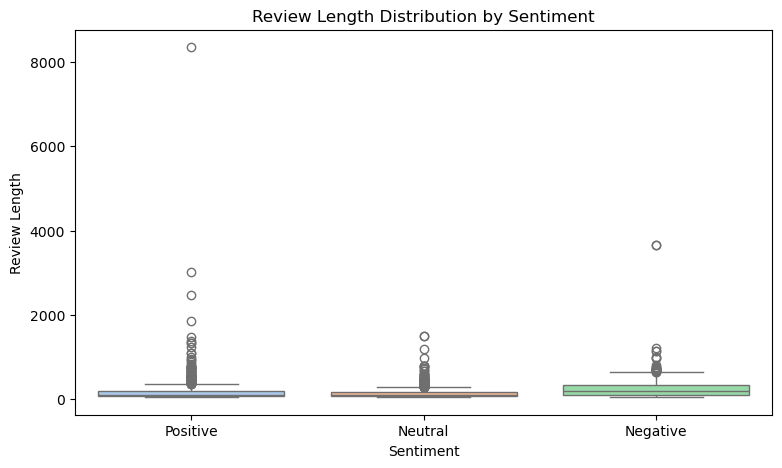

In [40]:
plt.figure(figsize=(9, 5))
sns.boxplot(x='Sentiment', y='Review_Length', data=train_data, palette='pastel')
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

### Observations:
Positive Sentiment:
Positive reviews are usually shorter, averaging about 34–35 words. This suggests that happy customers tend to keep their feedback brief and to the point, often just sharing quick praise.

Negative Sentiment:
Negative reviews are the longest, with an average of about 41 words. People who are unhappy with a product often write more details to explain what went wrong or why they were disappointed.

Neutral Sentiment:
Neutral reviews average around 37 words, which is between positive and negative ones. These reviews likely express balanced or moderate opinions, without being too critical or too enthusiastic.

### Insights:
Longer Reviews for Negative Sentiments:
People who write negative reviews usually share more details to explain what went wrong or why they were disappointed. This is why negative reviews tend to be longer.

Shorter Positive Reviews:

Positive reviews are often short and simple, using quick phrases like “great product” or “highly recommended.” This matches what we saw in the word cloud — satisfied customers usually keep their feedback brief.

Neutral Reviews:

Neutral reviews fall somewhere in between. They might include some details, but not as much as negative ones, showing a balanced and moderate tone.

### Business Implications:
Analyzing Negative Reviews:
Pay attention to longer negative reviews — they often contain specific details about what went wrong and can help identify areas for improvement.

Encouraging Positive Reviews:
Ask happy customers to write more detailed positive feedback to create a better balance in review lengths.

##  Feature Relationships

In [45]:
numerical_features = train_data.select_dtypes(include=['float64', 'int64'])
correlations = numerical_features.corr()

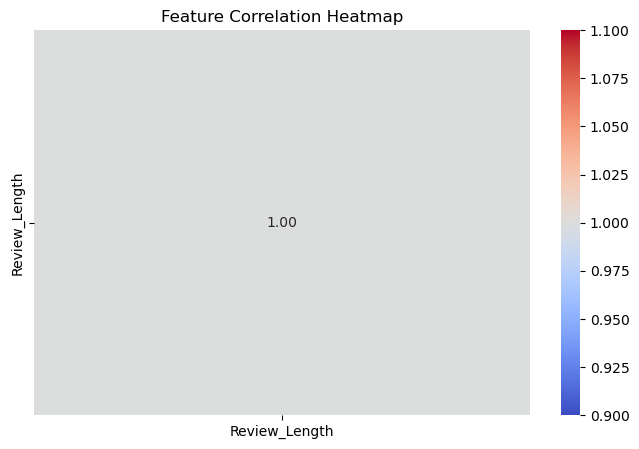

In [46]:
plt.figure(figsize=(8,5))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## Missing Other Numerical Features:
It seems the dataset only includes Review_Length or doesn’t have other useful numerical features for analysis.

## How to Improve:
If the dataset contains more numerical data (like ratings or word counts), include them in the analysis to find patterns or relationships.

## You can also create new features, such as:
Sentiment Polarity Score: A number showing how positive or negative a review is.
Average Word Length: The average size of words used in each review.
Number of Exclamation Marks: Can indicate strong emotions like excitement or frustration.

In [48]:
!pip install textblob

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [50]:
nltk.download('punkt_tab')
nltk.download('stopwords' )
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Initialize necessary tools

In [52]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#### Preprocess_text function

In [54]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation, apply lemmatization
    cleaned_tokens = [
        lemmatizer.lemmatize(word) for word in tokens
        if word not in stop_words and word not in string.punctuation
    ]
    return ' '.join(cleaned_tokens)

## Text Preprocessing
Tokenization: Breaking the text into individual words.
Stopword Removal: Removing common words like “the,” “is,” or “and” that don’t add much meaning.
Punctuation Removal: Cleaning the text by getting rid of punctuation marks.
Stemming/Lemmatization: Converting words to their base form (for example, “running” → “run”)

#### Apply preprocessing to review text

In [57]:
train_data['cleaned_reviews'] = train_data['reviewstext'].apply(preprocess_text)

#### Vectorization
Tf-Idf: Convert text into numerical features.

In [59]:
# Vectorization with Tf-Idf
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_data['cleaned_reviews'])

In [60]:
# Engineer additional features
train_data['word_count'] = train_data['reviewstext'].apply(lambda x: len(x.split()))
train_data['sentiment_score'] = train_data['reviewstext'].apply(lambda x: TextBlob(x).sentiment.polarity)

#### Combine Tf-Idf features and additional features like word counts or sentiment scores.

In [62]:
X_train_additional = np.hstack((
    X_train_tfidf.toarray(),
    train_data[['word_count', 'sentiment_score']].values
))

# Check processed data
print(X_train_additional.shape)

(4000, 4401)


In [63]:
train_data.head()

,categories,primaryCategories,reviewsdate,reviewstext,reviewstitle,sentiment,Sentiment,review_year,review_month,review_day,Review_Length,cleaned_reviews,word_count,sentiment_score
0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26 00:00:00+00:00,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,Positive,2016,12,26,409,purchased black fridaypros great price even sa...,72,0.363542
1,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17 00:00:00+00:00,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,Neutral,2018,1,17,593,purchased two amazon echo plus two dot plus fo...,113,0.458214
2,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20 00:00:00+00:00,Just an average Alexa option. Does show a few ...,Average,Neutral,Neutral,2017,12,20,81,average alexa option show thing screen still l...,15,-0.140476
3,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04 00:00:00+00:00,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,Neutral,2017,8,4,63,good product exactly wanted good price,12,0.690000
4,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23 00:00:00+00:00,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,Neutral,2017,1,23,179,3rd one 've purchased 've bought one niece cas...,35,0.187500


### Using VADER for Sentiment Analysis

In [65]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Example: Calculate sentiment score
train_data['sentiment_score'] = train_data['reviewstext'].apply(lambda x: sia.polarity_scores(x)['compound'])


# Calculate word count
train_data['word_count'] = train_data['reviewstext'].apply(lambda x: len(x.split()))

# Display results
print(train_data[['reviewstext', 'sentiment_score', 'word_count']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                         reviewstext  sentiment_score  \
0  Purchased on Black FridayPros - Great Price (e...           0.9709   
1  I purchased two Amazon in Echo Plus and two do...           0.9716   
2  Just an average Alexa option. Does show a few ...          -0.3291   
3  very good product. Exactly what I wanted, and ...           0.7496   
4  This is the 3rd one I've purchased. I've bough...           0.1779   

   word_count  
0          72  
1         113  
2          15  
3          12  
4          35  


## Explanation

Sentiment Score:
The compound score from VADER shows the overall feeling of a review — whether it’s positive, negative, or neutral.
The score ranges from -1 (very negative) to 1 (very positive).

Word Count:
By using len(x.split()), we count how many words are in each review.
This helps us see how long or detailed a review is.

# Baseline Model: Multinomial Naive Bayes

#####
We use Multinomial Naive Bayes (MNB) for text classification tasks like sentiment analysis because it is particularly suited for discrete feature data, such as word counts or term frequencies. Here's why it's a good choice.

##### Handles Text Data Well
##### Simplicity and Speed
##### Works Well with Sparse Data

In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [69]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X_train_tfidf, train_data['sentiment'], test_size=0.2, random_state=42
)

In [70]:
# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [71]:

# Predict on validation set
predictions = nb_model.predict(X_val)

# Evaluate the model
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
     Neutral       0.00      0.00      0.00        36
    Positive       0.94      1.00      0.97       751

    accuracy                           0.94       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.88      0.94      0.91       800



#### Address Class Imbalance

##### Use SMOTE (Synthetic Minority Oversampling Technique) or other resampling methods to balance the classes.

In [73]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print(pd.Series(y_resampled).value_counts())

sentiment
Positive    2998
Neutral     2998
Negative    2998
Name: count, dtype: int64


#### Support Vector Machine (SVM)

In [75]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_resampled, y_resampled)

# Predict on validation set
svm_predictions = svm_model.predict(X_val)

# Evaluate the model
print(classification_report(y_val, svm_predictions))

              precision    recall  f1-score   support

    Negative       0.89      0.62      0.73        13
     Neutral       0.59      0.28      0.38        36
    Positive       0.96      0.99      0.97       751

    accuracy                           0.95       800
   macro avg       0.81      0.63      0.69       800
weighted avg       0.94      0.95      0.94       800



#### Neural Network (MLP)

In [77]:
from sklearn.neural_network import MLPClassifier

# Train a simple neural network
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_resampled, y_resampled)

# Predict on validation set
mlp_predictions = mlp_model.predict(X_val)

# Evaluate the model
print(classification_report(y_val, mlp_predictions))

              precision    recall  f1-score   support

    Negative       0.88      0.54      0.67        13
     Neutral       0.61      0.31      0.41        36
    Positive       0.96      0.99      0.98       751

    accuracy                           0.95       800
   macro avg       0.82      0.61      0.68       800
weighted avg       0.94      0.95      0.95       800



## LSTM (Long Short-Term Memory)

#### Preprocess text into sequences and train using an embedding layer.

In [80]:
!pip install tensorflow

In [81]:
import tensorflow as tensorflow

In [82]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and convert text to sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['cleaned_reviews'])

X_train_seq = tokenizer.texts_to_sequences(train_data['cleaned_reviews'])
X_train_padded = pad_sequences(X_train_seq, maxlen=200)  # Adjust maxlen as needed

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

In [84]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your sentiment labels
label_encoder.fit(train_data['Sentiment'])  # Use 'Sentiment' column

# Transform the sentiment labels to numerical values
train_data['sentiment_encoded'] = label_encoder.transform(train_data['Sentiment'])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your sentiment labels
label_encoder.fit(train_data['Sentiment'])  # Use 'Sentiment' column

# Transform the sentiment labels to numerical values
train_data['sentiment_encoded'] = label_encoder.transform(train_data['Sentiment'])

# Now use the encoded sentiment for training:
model.fit(X_train_padded, train_data['sentiment_encoded'], batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 405ms/step - accuracy: 0.5997 - loss: 0.0000e+00 - val_accuracy: 0.5800 - val_loss: 0.0000e+00
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 384ms/step - accuracy: 0.6037 - loss: 0.0000e+00 - val_accuracy: 0.5800 - val_loss: 0.0000e+00
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 395ms/step - accuracy: 0.6037 - loss: 0.0000e+00 - val_accuracy: 0.5800 - val_loss: 0.0000e+00
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 382ms/step - accuracy: 0.6037 - loss: 0.0000e+00 - val_accuracy: 0.5800 - val_loss: 0.0000e+00
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 399ms/step - accuracy: 0.6037 - loss: 0.0000e+00 - val_accuracy: 0.5800 - val_loss: 0.0000e+00


In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

In [86]:
# Apply preprocessing to review text in test_data as well
test_data['cleaned_reviews'] = test_data['reviewstext'].apply(preprocess_text)

# Now proceed with tokenization and prediction
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and convert text to sequences
X_test_seq = tokenizer.texts_to_sequences(test_data['cleaned_reviews'])
X_test_padded = pad_sequences(X_test_seq, maxlen=200)  # Use the same maxlen as during training

# Now you can use X_test_padded in your prediction:
y_pred_proba = model.predict(X_test_padded)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


In [88]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# ... (Your previous code for model training) ...

# Assuming X_train_padded and train_data['sentiment_encoded'] are your features and labels
# Use the same X_test for prediction as used for evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X_train_padded, train_data['sentiment_encoded'], test_size=0.2, random_state=42
)

# Convert labels to one-hot encoding for multi-class classification
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


# Now use the encoded sentiment for training:
# Adjust the model to have 3 output nodes with softmax activation
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')  # 3 output nodes for 3 classes
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Use categorical_crossentropy loss
model.fit(X_train, y_train_encoded, batch_size=32, epochs=5, validation_split=0.2)


# Prediction should be done on X_test, not X_test_padded
y_pred_proba = model.predict(X_test)  # Changed to X_test


# After prediction, get the predicted labels (classes)
y_pred = np.argmax(y_pred_proba, axis=1)  # Get class with highest probability


# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate AUC-ROC (requires probabilities and encoded labels)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Print metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 35s 383ms/step - accuracy: 0.6914 - loss: 0.7452 - val_accuracy: 0.8719 - val_loss: 0.3610
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 33s 419ms/step - accuracy: 0.8879 - loss: 0.3384 - val_accuracy: 0.8828 - val_loss: 0.3211
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 34s 429ms/step - accuracy: 0.9316 - loss: 0.1963 - val_accuracy: 0.8359 - val_loss: 0.3998
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 29s 368ms/step - accuracy: 0.9523 - loss: 0.1438 - val_accuracy: 0.8766 - val_loss: 0.4167
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 314ms/step - accuracy: 0.9754 - loss: 0.0802 - val_accuracy: 0.8594 - val_loss: 0.5016
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step
Precision: 0.85
Recall: 0.86
F1-Score: 0.85
AUC-ROC: 0.91

Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.35      0.41       108
     Neutral       0.85      0.92      0.89       454
    Positive       1.00      0.99      1.00       238

    accuracy        

In [89]:
print("Shape of y_pred_proba:", y_pred_proba.shape)
print("Number of classes in y_test:", len(set(y_test)))

Shape of y_pred_proba: (800, 3)
Number of classes in y_test: 3


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')

# Load your data (replace with your dataset)
reviews = train_data['reviewstext']  # Replace 'review_text' with the appropriate column name

# Define preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in string.punctuation and word not in stopwords.words('english')]
    # Join tokens back to a single string
    return ' '.join(tokens)

# Apply preprocessing
reviews_cleaned = reviews.apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = count_vectorizer.fit_transform(reviews_cleaned)

# For NMF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(reviews_cleaned)

### Latent Dirichlet Allocation (LDA)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Define number of topics
num_topics = 5

# Initialize and fit LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(dtm)

### Non-Negative Matrix Factorization (NMF)

In [ ]:
from sklearn.decomposition import NMF

# Define number of topics
num_topics = 5

# Initialize and fit NMF model
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf)

## Extract Topics
### For LDA

In [ ]:
# Get feature names
feature_names = count_vectorizer.get_feature_names_out()

# Display topics
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])

## For NMF

In [ ]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display topics
for idx, topic in enumerate(nmf_model.components_):
    print(f"Topic {idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])

## Assign Topics to Reviews

In [ ]:
# Get topic probabilities for each document
lda_topic_probs = lda_model.transform(dtm)

# Assign the most probable topic
reviews_topics = lda_topic_probs.argmax(axis=1)
train_data['Topic'] = reviews_topics

In [ ]:
# Get topic probabilities for each document
nmf_topic_probs = nmf_model.transform(tfidf)

# Assign the most probable topic
reviews_topics = nmf_topic_probs.argmax(axis=1)
train_data['Topic'] = reviews_topics

## Visualize Topics

In [ ]:
import seaborn as sns

sns.countplot(x='Topic', data=train_data)
plt.title('Distribution of Topics')
plt.show()